In [1]:
from base64 import b64decode
from json import loads
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
# set matplotlib to display all plots inline with the notebook
%matplotlib inline

In [2]:
# Hyperparameters
m = 10000 #global for MNIST = 60000
k = 1000 #local set size
t = 1200 #threshold for euclidean distance

#constants
INIT_VAL = -9000

60000
4


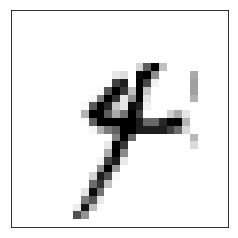

In [3]:
"""
Open the JSON file, passing all the lines to lines.
Then use loads from json to get the json into digit dictionary
Print the label of one item to test
Display the image of that item
"""
with open('digits.base64.json','r') as f:
    lines = f.readlines()
    print(len(lines))
    digit = loads(lines[53])
    
    print(digit['label'])
    image = np.fromstring(b64decode(digit['data']),dtype=np.ubyte)
    image = image.astype(np.float64)

    plt.figure()
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [4]:
def below_threshold(dst) :
    """
    This method returns true if the value
    is less than the threshold
    """
    if(dst < t):
        return True
    else:
        return False

In [5]:
def find_distances():
    """
    This method creates a k*m matrix 
    of the euclidean distances between 
    the members of the local set and the members of the global set.
    If the euclidean distance is not below the threshold, the distance is set to -1.
    """
    distances = np.reshape(np.arange(k*m),(k,m))
    x = 0
    for x in range (k):
        y = 0
        a = loads(lines[x])
        local_member = np.fromstring(b64decode(a['data']),dtype=np.ubyte)
        local_member = local_member.astype(np.float64)
        
        for y in range (m):
            b = loads(lines[y])
            global_member = np.fromstring(b64decode(b['data']),dtype=np.ubyte)
            global_member = global_member.astype(np.float64)
            dst = distance.euclidean(local_member, global_member)
            if(below_threshold(dst) == False):
                distances[x,y] = -1
            else:
                distances[x,y] = dst
            y += 1
        x += 1
    return distances

In [6]:
def find_pivot(distances):
    """
    This method finds the pivot by finding the point 
    with the most close neighbors in the neighborhood
    """
    pivot = 0
    g = 0
    y = 0
    for y in range (m):
        x = 0
        n = 0
        for x in range (k):
            dst = distances[x,y]
            if(dst >= 0):
                n += 1
            x += 1
        if (n > g):
            pivot = y
            g = n
        y += 1
    return pivot

In [7]:
def find_neighbor_labels(pivot):
    """
    This method finds the labels of all the close neighbors of the pivot in the global set.
    """
    labels = np.full(k, INIT_VAL)
    a = loads(lines[pivot])
    pivot_val = np.fromstring(b64decode(a['data']),dtype=np.ubyte)
    pivot_val = pivot_val.astype(np.float64)
    pivot_label = a['label']
    labels[0] = pivot_label
    x = 0
    i = 1
    for x in range (k):
        if(x != pivot):
            b = loads(lines[x])
            candidate = np.fromstring(b64decode(b['data']),dtype=np.ubyte)
            candidate = candidate.astype(np.float64)
            x_label = b['label']
            if(distance.euclidean(pivot_val, candidate) <= t):
                labels[i] = x_label
                i += 1
        x += 1
    print(labels)
    return labels

In [8]:
def find_neighbor_indices(pivot):
    """
    This method finds the indices of all the close neighbors of the pivot in the global set.
    """
    indices = np.full(k, INIT_VAL)
    a = loads(lines[pivot])
    pivot_val = np.fromstring(b64decode(a['data']),dtype=np.ubyte)
    pivot_val = pivot_val.astype(np.float64)
    indices[0] = pivot
    x = 0
    i = 1
    for x in range (k):
        if(x != pivot):
            b = loads(lines[x])
            candidate = np.fromstring(b64decode(b['data']),dtype=np.ubyte)
            candidate = candidate.astype(np.float64)
            if(distance.euclidean(pivot_val, candidate) <= t):
                indices[i] = x
                i += 1
        x += 1
   # print(indices)
    return indices

In [9]:
def is_correct(labels):
    """
    This method gives a correctness score to the algorithm 
    based on the similarity of the neighbors to the pivot.
    A score of 0 means there are no inaccurately classified neighbors.
    """
    x = 1
    wrongness_score = 0
    correctness_score = 0
    incorrect_labels = np.full(k, INIT_VAL)
    i = 0
    for x in range (k):
        if(labels[x] != labels[0] and labels[x] != INIT_VAL):
            wrongness_score += 1
            incorrect_labels[i] = labels[x]
            i += 1
        elif(labels[x] == labels[0]):
            correctness_score += 1
        x += 1
    print(correctness_score, " are correctly classified")
    print(wrongness_score, " are incorrectly classified")
    print("incorrect label(s): ", incorrect_labels)
    return incorrect_labels

In [10]:
def id_wrong_indices(indices, labels):
  #  This method returns the indices of the incorrectly classified points.
    x = 1
    incorrect_indices = np.full(k, INIT_VAL)
    i = 0
    for x in range (k):
        if(labels[x] != labels[0] and labels[x] != INIT_VAL):
            incorrect_indices[i] = indices[x]
            i += 1
        x += 1
    return incorrect_indices

In [11]:
#Find distances, pivot, neighbors, and correctness score.
is_correct(find_neighbor_labels(find_pivot(find_distances())))
id_wrong_indices(find_neighbor_indices(find_pivot(find_distances())), find_neighbor_labels(find_pivot(find_distances())))

49  are correctly classified
0  are incorrectly classified
incorrect label(s):  [-9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -9000
 -9000 -9000 -9000 -9000 -9000 -9000 -9000 -

KeyboardInterrupt: 